In [17]:

import pandas as pd

df = pd.read_csv(r"C:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Giorno 20 30-04\esercitazione\AB_NYC_2019.csv")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [2]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [3]:
df.drop(columns=["last_review", "reviews_per_month"], inplace=True)
df.dropna(subset=["name", "host_name"], inplace=True)


In [4]:
df.shape

(48858, 14)

In [5]:
df["neighbourhood_group"].unique()
df["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

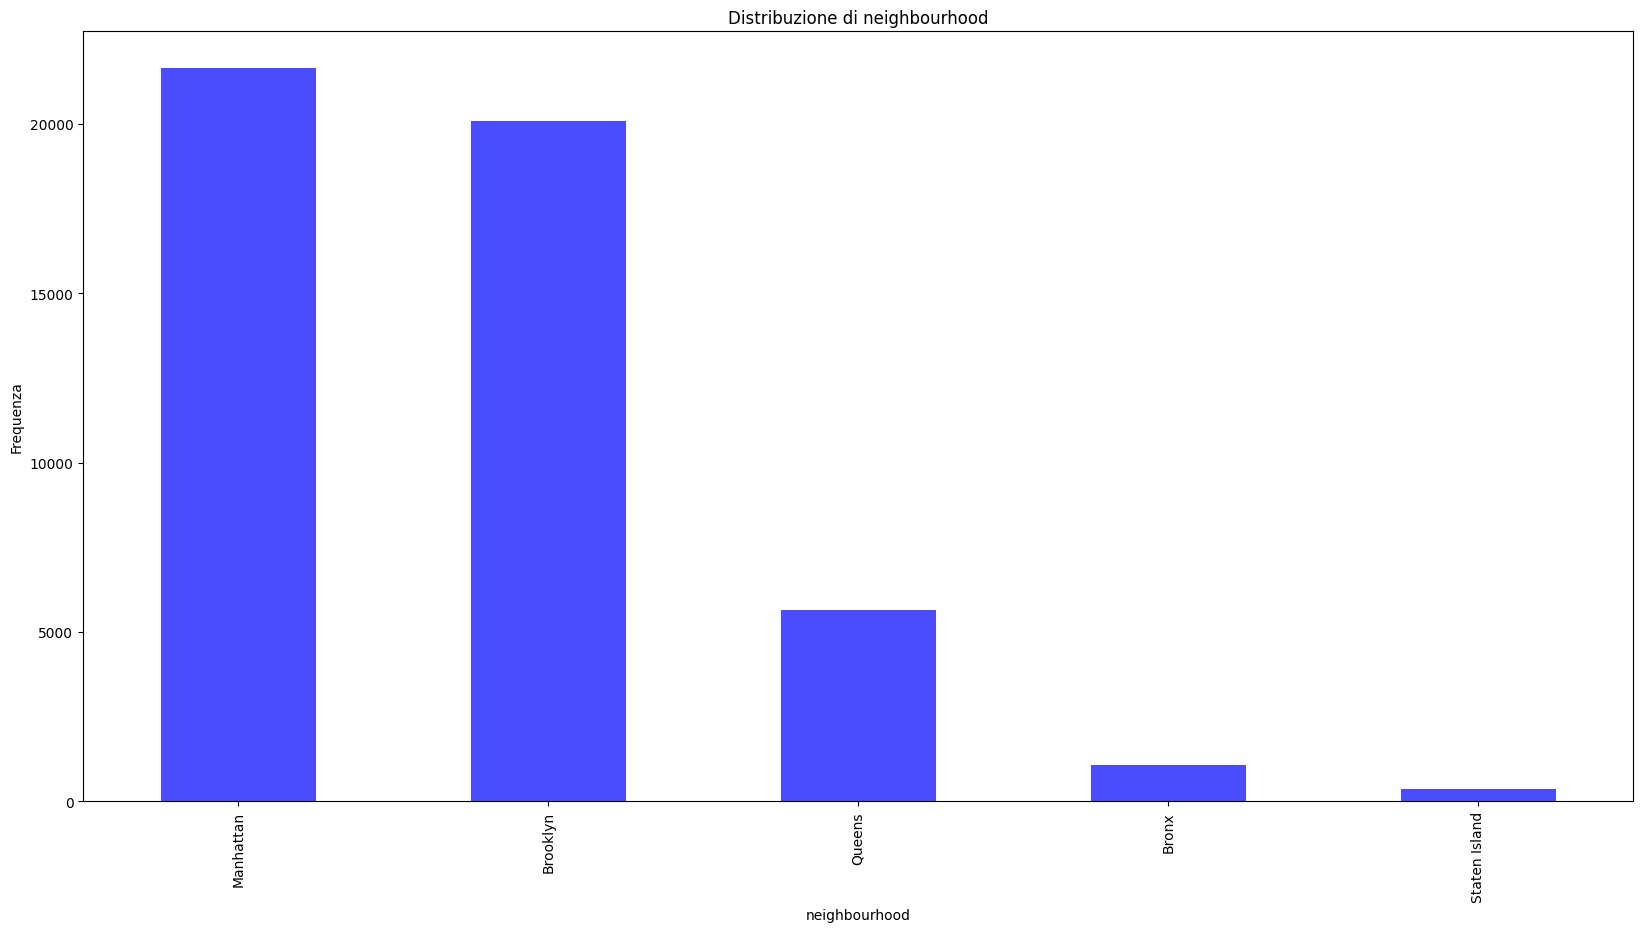

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribuzione di neighbourhood
df["neighbourhood_group"].value_counts().plot(kind="bar", figsize=(20, 10), color="blue", alpha=0.7)
plt.title("Distribuzione di neighbourhood")
plt.xlabel("neighbourhood")
plt.ylabel("Frequenza")
plt.xticks(rotation=90)
plt.show()


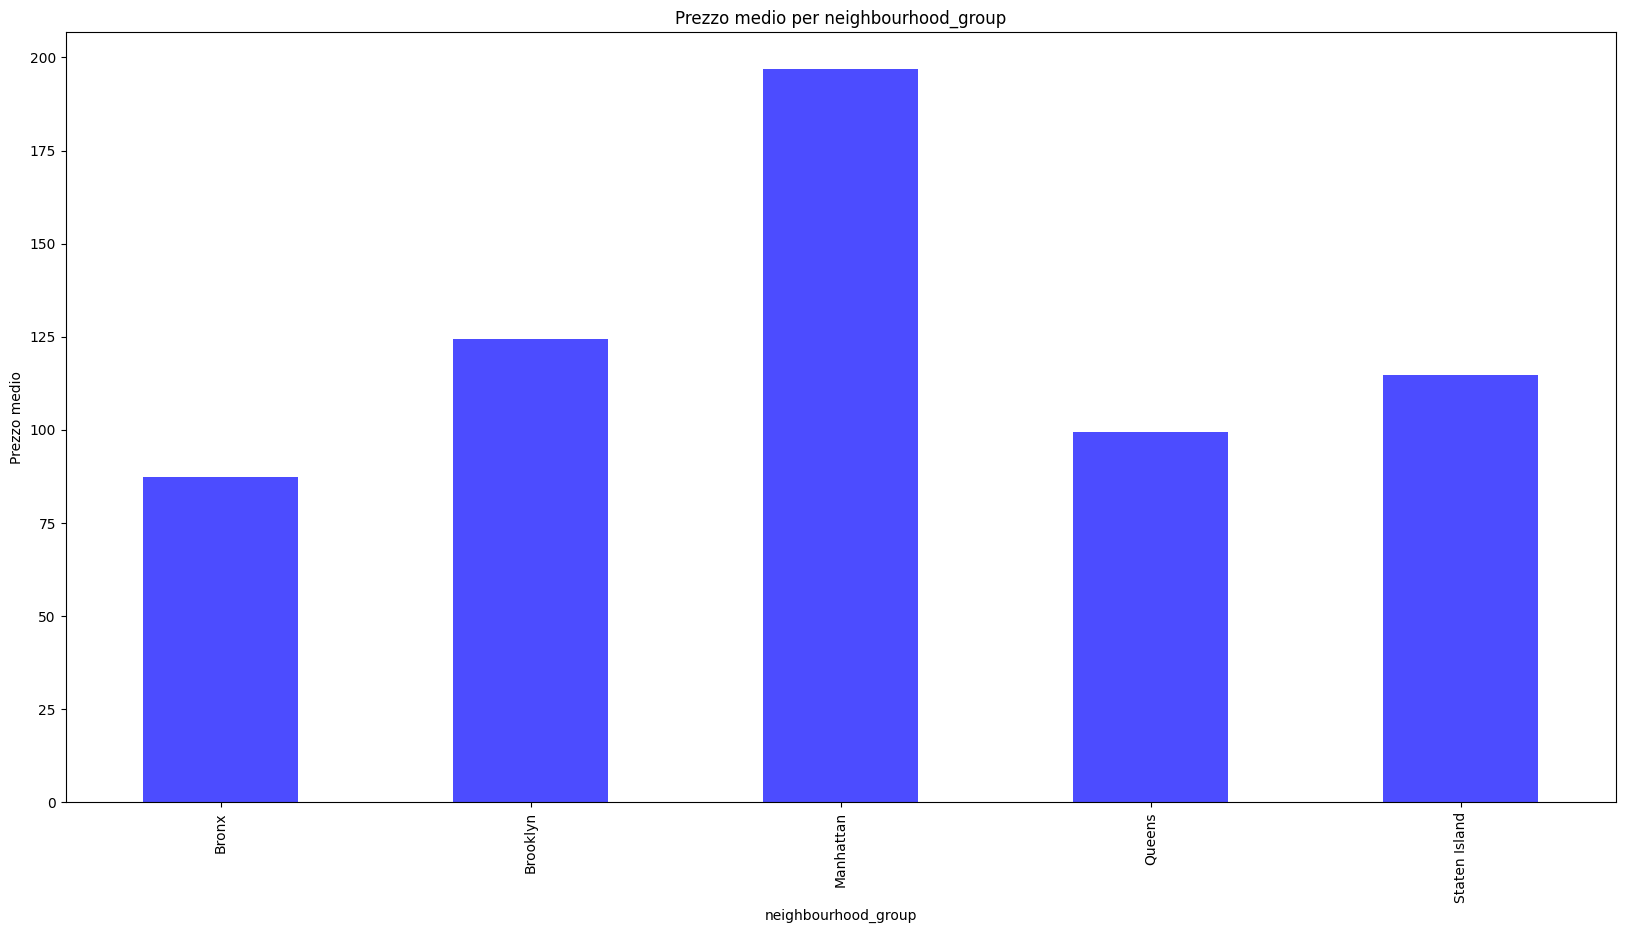

In [7]:
# correlazione tra prezzo e neighbourhood_group
df.groupby("neighbourhood_group")["price"].mean().plot(kind="bar", figsize=(20, 10), color="blue", alpha=0.7)
plt.title("Prezzo medio per neighbourhood_group")
plt.xlabel("neighbourhood_group")
plt.ylabel("Prezzo medio")
plt.xticks(rotation=90)
plt.show()

In [8]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
# Get dummies for room_type and neighbourhood_group
room_type_dummies = pd.get_dummies(df['room_type'], prefix='room_type')
neighbourhood_group_dummies = pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group')

# Concatenate the dummy variables with the original dataframe
df_with_dummies = pd.concat([df, room_type_dummies, neighbourhood_group_dummies], axis=1)

# Display the first few rows
df_with_dummies.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,False,True,False,False,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,True,False,False,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,365,False,True,False,False,False,True,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,True,False,False,False,True,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,True,False,False,False,False,True,False,False
